# Etapas

### Etapa 1: Análise Exploratória de Dados
- 1.1: Realizar Importação de Dados e Primeira Análise
- 1.2: Verificar Valores Nulos
- 1.3: Verificar Valores Únicos

### Etapa 2: Preparação de Dados
- 2.1: Unir Nomes
- 2.2: Criar Coluna Tags
- 2.3: Processar Coluna Tags

### Etapa 3: Construção de Modelo de Similaridade de Cosseno
- 3.1: Construir Modelo
- 3.1: Criar Sistema de Recomendações
- 3.2: Criar Sistema de Recomendações Alternativo

# Etapa 1: Análise Exploratória de Dados

In [32]:
import pandas as pd
import re
import matplotlib.pyplot as plt

### 1.1: Realizar Importação de Dados e Primeira Análise

In [33]:
disney_df = pd.read_csv('disney_plus_titles.csv')
disney_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


In [34]:
disney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


### 1.2: Verificar Valores Nulos

In [35]:
disney_df.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

### 1.3: Verificar Valores Únicos

In [36]:
colunas_verificar = ['type', 'rating']

for coluna in colunas_verificar:
    valores_unicos = disney_df[coluna].unique()
    print(f"Valores únicos na coluna'{coluna}':'{valores_unicos}'")

Valores únicos na coluna'type':'['Movie' 'TV Show']'
Valores únicos na coluna'rating':'['TV-G' 'PG' 'TV-PG' nan 'PG-13' 'TV-14' 'G' 'TV-Y7' 'TV-Y' 'TV-Y7-FV']'


# Etapa 2: Preparação de Dados

In [37]:
disney_df_clean = disney_df.copy()

### 2.1: Preencher Valores Vazios

In [38]:
def unir_nomes(df, colunas):
    for coluna in colunas:
        df[coluna] = df[coluna].apply(lambda x: ', '.join([nome.replace(' ', '') for nome in x.split(',')]) if isinstance(x, str) else x)


In [39]:
unir_nomes(disney_df_clean, ['director', 'cast'])

In [40]:
disney_df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"AlonsoRamirezRamos, DaveWasson","ChrisDiamantopoulos, TonyAnselmo, TressMacNeil...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,JohnCherry,"JimVarney, NoelleParker, DouglasSeale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,KarenDisher,"RaymondAlbertRomano, JohnLeguizamo, DenisLeary...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,HamishHamilton,"DarrenCriss, AdamLambert, DerekHough, Alexande...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"JohnLennon, PaulMcCartney, GeorgeHarrison, Rin...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


### 2.2: Criar Coluna Tags

In [41]:
def criar_coluna_tags(dataframe, colunas):
    dataframe[colunas] = dataframe[colunas].astype(str)
    dataframe['tags'] = dataframe[colunas].agg(" ".join, axis=1)

In [42]:
criar_coluna_tags(disney_df_clean, ['type', 'title', 'director', 'cast', 'country', 'release_year', 'rating', 'listed_in', 'description'])

In [43]:
disney_df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tags
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"AlonsoRamirezRamos, DaveWasson","ChrisDiamantopoulos, TonyAnselmo, TressMacNeil...",nan,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,Movie Duck the Halls: A Mickey Mouse Christmas...
1,s2,Movie,Ernest Saves Christmas,JohnCherry,"JimVarney, NoelleParker, DouglasSeale",nan,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,Movie Ernest Saves Christmas JohnCherry JimVar...
2,s3,Movie,Ice Age: A Mammoth Christmas,KarenDisher,"RaymondAlbertRomano, JohnLeguizamo, DenisLeary...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Movie Ice Age: A Mammoth Christmas KarenDisher...
3,s4,Movie,The Queen Family Singalong,HamishHamilton,"DarrenCriss, AdamLambert, DerekHough, Alexande...",nan,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",Movie The Queen Family Singalong HamishHamilto...
4,s5,TV Show,The Beatles: Get Back,nan,"JohnLennon, PaulMcCartney, GeorgeHarrison, Rin...",nan,"November 25, 2021",2021,nan,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,"TV Show The Beatles: Get Back nan JohnLennon, ..."


### 2.3: Processar Coluna Tags

In [44]:
def processar_tags(tags):
    tags = re.sub(r"\s+", " ", tags)
    tags = tags.lower()
    return tags

In [45]:
def aplicar_processar_tags(dataframe, coluna):
    dataframe[coluna] = dataframe[coluna].astype(str)
    dataframe[coluna] = dataframe[coluna].apply(processar_tags)

In [46]:
aplicar_processar_tags(disney_df_clean, 'tags')

In [47]:
disney_df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tags
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"AlonsoRamirezRamos, DaveWasson","ChrisDiamantopoulos, TonyAnselmo, TressMacNeil...",nan,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,movie duck the halls: a mickey mouse christmas...
1,s2,Movie,Ernest Saves Christmas,JohnCherry,"JimVarney, NoelleParker, DouglasSeale",nan,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,movie ernest saves christmas johncherry jimvar...
2,s3,Movie,Ice Age: A Mammoth Christmas,KarenDisher,"RaymondAlbertRomano, JohnLeguizamo, DenisLeary...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,movie ice age: a mammoth christmas karendisher...
3,s4,Movie,The Queen Family Singalong,HamishHamilton,"DarrenCriss, AdamLambert, DerekHough, Alexande...",nan,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",movie the queen family singalong hamishhamilto...
4,s5,TV Show,The Beatles: Get Back,nan,"JohnLennon, PaulMcCartney, GeorgeHarrison, Rin...",nan,"November 25, 2021",2021,nan,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,"tv show the beatles: get back nan johnlennon, ..."


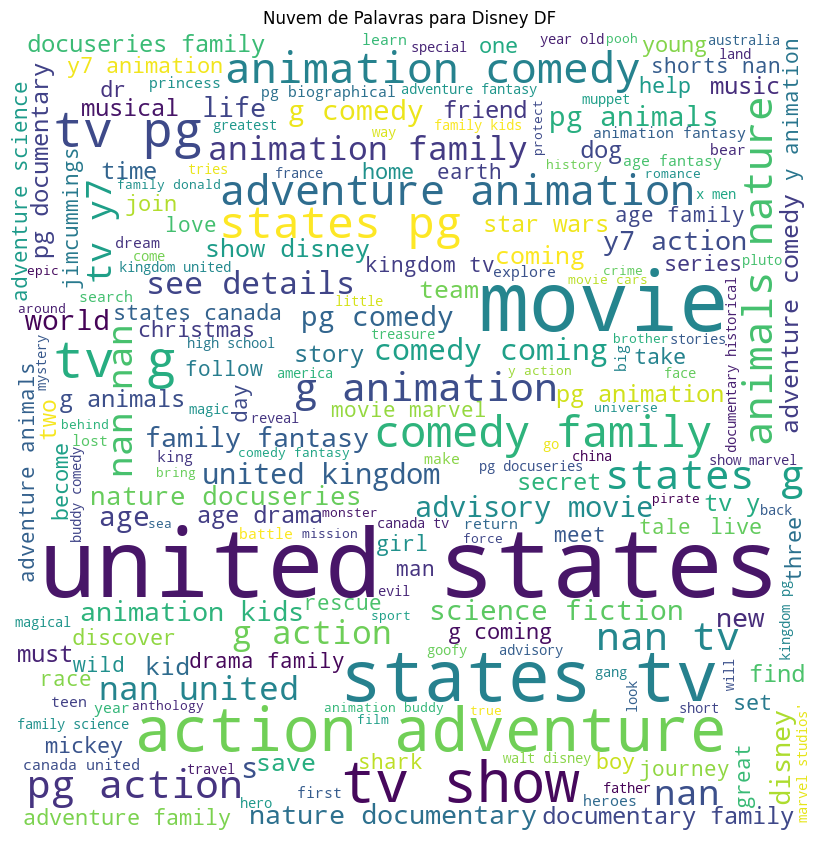

In [48]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Juntar todas as tags para o alvo 0
tags_0 = ' '.join(disney_df_clean['tags'])

# Gerar nuvem de palavras para o alvo 0
nuvem_palavras_0 = WordCloud(width=800, height=800, 
                             background_color='white', 
                             stopwords=None, 
                             min_font_size=10).generate(tags_0)

# Plotar nuvem de palavras para o alvo 0
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(nuvem_palavras_0) 
plt.axis("off") 
plt.tight_layout(pad=0) 

plt.title('Nuvem de Palavras para Disney DF')

# # Salvar o gráfico como um arquivo de imagem (por exemplo, PNG)
# plt.savefig('nuvem_palavras_alvo_0.png', bbox_inches='tight')

plt.show()

### 

# Etapa 3: Construção de Modelo de Similaridade de Cosseno

### 3.1: Construir Modelo

In [49]:
from transformers import BertTokenizer, BertModel
import torch
from torch.utils.data import Dataset, DataLoader

# Carregar o modelo BERT e o tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

class DisneyTagsDataset(Dataset):
    def __init__(self, tags):
        # Tokenizar as tags e armazenar os encodings
        self.encodings = tokenizer(tags, truncation=True, padding=True, max_length=512, return_tensors='pt')
    
    def __getitem__(self, idx):
        # Retornar os encodings para o índice fornecido
        return {key: val[idx] for key, val in self.encodings.items()}
    
    def __len__(self):
        # Retornar o número total de itens
        return len(self.encodings['input_ids'])

# Criar o dataset
dataset = DisneyTagsDataset(disney_df_clean['tags'].tolist())
data_loader = DataLoader(dataset, batch_size=16, shuffle=False)



In [50]:
embeddings = []

# Desativar o cálculo de gradiente para economizar memória
model.eval()
with torch.no_grad():
    for batch in data_loader:
        inputs = {key: val.to(model.device) for key, val in batch.items()}
        outputs = model(**inputs)
        # Usar a média dos embeddings de todas as camadas ocultas
        batch_embeddings = outputs.last_hidden_state.mean(dim=1)
        embeddings.append(batch_embeddings.cpu())

# Concatenar todos os embeddings em uma matriz
embeddings_matrix = torch.cat(embeddings).numpy()

### 3.2: Criar Sistema de Recomendações

In [51]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular a matriz de similaridade de cosseno
similarity = cosine_similarity(embeddings_matrix)

def recommend(movie):
    # Obter o índice do filme
    index = disney_df_clean[disney_df_clean['title'] == movie].index[0]
    
    # Obter as distâncias (similaridade) ordenadas
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    
    # Exibir os 10 filmes mais similares
    recommended_movies = [disney_df_clean.iloc[i[0]].title for i in distances[1:10]]
    return pd.DataFrame(recommended_movies, columns=['Recommended Movies'])


In [52]:
recommend('Home Alone')

,Recommended Movies
0,Home Alone 2: Lost in New York
1,The Small One
2,Meet the Deedles
3,Mickey's Twice Upon a Christmas
4,The Sandlot
5,The Bears and I
6,Richie Rich's Christmas Wish
7,Blank Check
8,George of the Jungle 2


In [53]:
recommend('101 Dalmatians')

,Recommended Movies
0,102 Dalmatians
1,The Ugly Dachshund
2,The Aristocats
3,The Brave Little Toaster Goes to Mars
4,Alice in Wonderland
5,The Sword in the Stone
6,The Adventures of Ichabod and Mr. Toad
7,101 Dalmatians II: Patch's London Adventure
8,Tummy Trouble


In [54]:
recommend("X-Men")

,Recommended Movies
0,X2
1,X-Men: The Last Stand
2,Marvel Studios' The Avengers
3,X-Men: Apocalypse
4,Fantastic Four
5,Fantastic Four: Rise of the Silver Surfer
6,Marvel Studios' Iron Man
7,Rogue One: A Star Wars Story
8,Marvel Studios' Captain America: The First Ave...


### 3.3: Criar Sistema de Recomendações Alternativo

In [55]:
from fuzzywuzzy import process

def recomendar_alternativo(filme):
    filme = filme.lower()  # Padroniza o título inserido
    # Cria uma lista com os títulos do dataframe
    titles = disney_df_clean['title'].tolist()

    # Encontra o título mais próximo usando fuzzywuzzy
    best_match, score = process.extractOne(filme, titles)

    # Se o score for alto o suficiente (exemplo, 80 ou mais), pega o índice do filme
    if score > 50:
        matching_filmes = disney_df_clean[disney_df_clean['title'] == best_match]
        index = matching_filmes.index[0]
        distancia = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
        
        for i in distancia[1:11]:
            print(disney_df_clean.iloc[i[0]].title)
    else:
        print("Nenhum título encontrado com um bom grau de correspondência.")

In [56]:
recomendar_alternativo("Star wOrs")

LEGO Star Wars Holiday Special
Marvel Battleworld: Mystery of the Thanostones
Kim Possible Movie: So the Drama
Pirates of the Caribbean: At World's End
Rogue One: A Star Wars Story
Treasure Planet
The Avengers: Earth's Mightiest Heroes
Gargoyles
LEGO Star Wars: The New Yoda Chronicles – Race for the Holocrons
Marvel Studios' Guardians of the Galaxy Vol. 2


In [57]:
recomendar_alternativo("toi estori")

Toy Story 3
Toy Story 2
Toy Story of Terror!
Toy Story Toons: Small Fry
The Fox and the Hound
Winnie the Pooh
Toy Story Toons: Hawaiian Vacation
Brave Little Toaster to the Rescue
Disney Mickey Mouse Clubhouse
Monsters, Inc.
